In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

$$\mathcal N(\mathbf {x},\boldsymbol {\mu },{\boldsymbol \Sigma})= \frac{1}{\sqrt{(2\pi)^k\det(\boldsymbol \Sigma)}}
e^{{-\frac {1}{2}}(\mathbf {x} -{\boldsymbol {\mu }})^T {\boldsymbol \Sigma}^{-1}(\mathbf {x} -{\boldsymbol {\mu }})}$$

- Feature Vector: $\mathbf {x}$
- Mean/Centroid: ${\boldsymbol \mu=\mathbf {\bar x}}$
- Covariance matrix: ${\boldsymbol \Sigma}$
- Dimension: ${k}=$ number of features



In [2]:
#Let's create some normally distributed test data

def gaussian_pts_2d(N=1000,x=None,sigmas=None,theta=0,show=False):
    if x==None:
        x=[0,0]
    if sigmas==None:
        sigmas=[0,0]
    D=2
    theta=theta*180/np.pi
    rot_mat=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])    
    gauss_pts=(np.random.randn(N,D)*np.array(sigmas)@rot_mat)+np.array(x) 
    if show:
        plt.figure(figsize=(5,5))
        plt.scatter(gauss_pts[:,0],gauss_pts[:,1],alpha=0.1)
    return gauss_pts

(-30, 30)

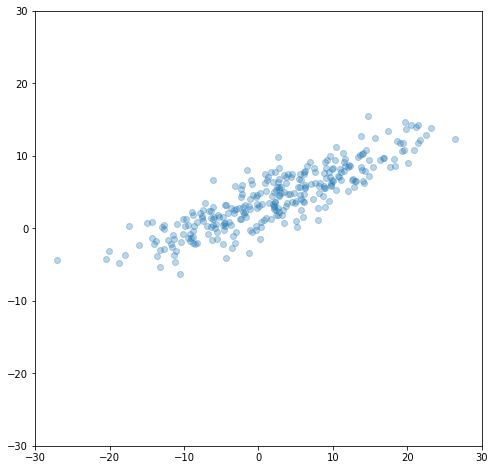

In [3]:
X=gaussian_pts_2d(N=300,x=[2,4],sigmas=[10,2],theta=30,show=False)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.xlim(-30,30)
plt.ylim(-30,30)

Now let's calculate the centroid and covariance matrix.

In [4]:
N,k=X.shape
mu=X.mean(axis=0,keepdims=True)
X_=X-mu
cov=X_.T@X_/N
cov,mu

(array([[94.62685668, 37.68835444],
        [37.68835444, 19.47023794]]), array([[2.26640351, 4.22984454]]))

In [5]:
GM = multivariate_normal(mu.reshape(-1), cov)

In [6]:
GM.rvs(1)

array([-9.74474329, -6.30513964])

In [ ]:
GM.mean

Now we generate the function $\mathcal N(\mathbf {x},\boldsymbol {\mu },{\boldsymbol \Sigma})$ using pdf

In [8]:
#this will generate the function in
GM.pdf([0,0])

0.0021794682221185817

In [9]:
def plot_2D_pdf(pdf,min_=None,max_=None,delta=1):
    if min_==None:
        min_=[-10,-10]
    if max_==None:
        max_=[10,10]
    x_min,y_min=min_
    x_max,y_max=max_
    x, y = np.mgrid[x_min:x_max:delta, y_min:y_max:delta]
    xy=np.array([x,y])
    xy=np.rollaxis(xy,0,3)
    pxy = np.array([pdf(xy) for xy in xy.reshape(-1,2)]).reshape(x.shape)
    plt.figure(figsize=(8,8))
    plt.contourf(x, y, pxy,levels=30,cmap='gray')
    plt.contour(x, y, pxy)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

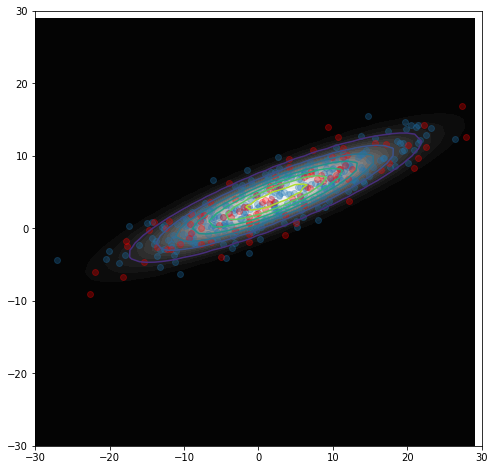

In [12]:
plot_2D_pdf(GM.pdf,min_=[-30,-30],max_=[30,30])
X_new_samp=GM.rvs(100)
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(X_new_samp[:,0],X_new_samp[:,1],c='r',alpha=0.3)

In [ ]:
X.shape

In [13]:

GMS=[multivariate_normal(x,cov=1) for x in X]

In [15]:
np.random.choice(GMS).rvs(1)

array([12.91788256,  7.65403686])

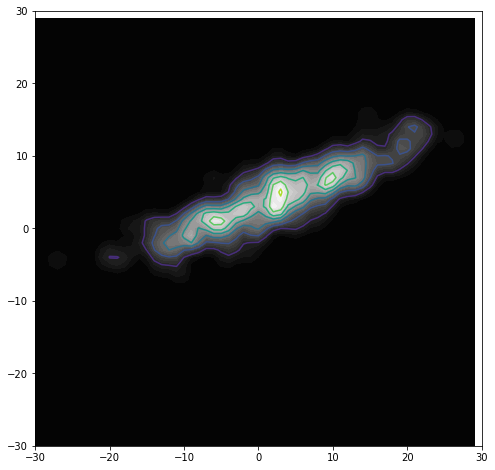

In [16]:
kde_pdf=(lambda xy: sum([gm.pdf(xy) for gm in GMS ])/len(GMS))
plot_2D_pdf(pdf=kde_pdf,min_=[-30,-30],max_=[30,30],delta=1)

In [17]:
X1=gaussian_pts_2d(N=150,x=[2,4],sigmas=[10,2],theta=30,show=False)
X2=gaussian_pts_2d(N=150,x=[-6,-12],sigmas=[5,3],theta=-10,show=False)
X12=np.vstack([X1,X2])
X12.shape

(300, 2)

(-30, 30)

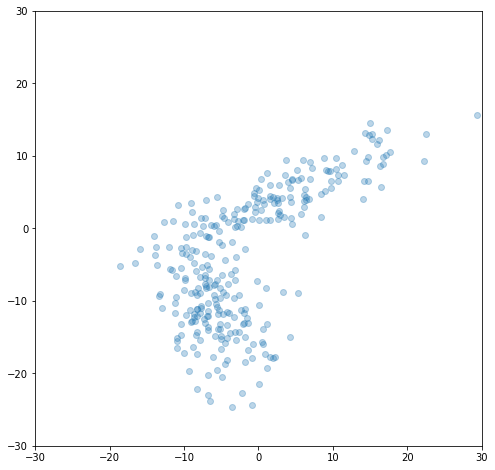

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X12[:,0],X12[:,1],alpha=0.3)
plt.xlim(-30,30)
plt.ylim(-30,30)

In [19]:
N12,k12=X12.shape
mu12=X12.mean(axis=0,keepdims=True)
X12_=X12-mu12
cov12=X12_.T@X12_/N12
cov12,mu12

(array([[66.1174863 , 45.97703921],
        [45.97703921, 84.37683299]]), array([[-1.86597948, -3.99920828]]))

In [20]:
GM12 = multivariate_normal(mu12.reshape(-1), cov12)

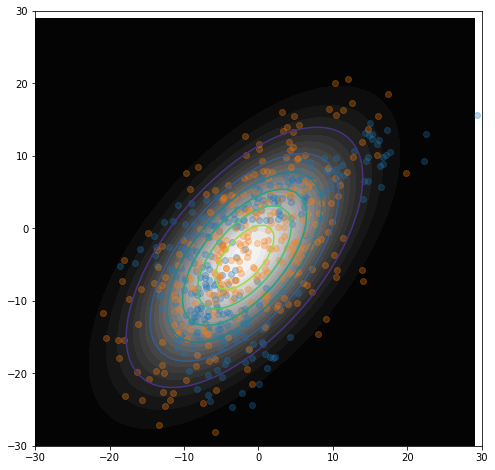

In [23]:
plot_2D_pdf(GM12.pdf,min_=[-30,-30],max_=[30,30])
plt.scatter(X12[:,0],X12[:,1],alpha=0.3)
X12_GM_new=GM12.rvs(300)
plt.scatter(X12_GM_new[:,0],X12_GM_new[:,1],alpha=0.3)

In [24]:
GMS12_1=[multivariate_normal(x,cov=1) for x in X12]
GMS12_2=[multivariate_normal(x,cov=2) for x in X12]
GMS12_5=[multivariate_normal(x,cov=5) for x in X12]
GMS12_10=[multivariate_normal(x,cov=10) for x in X12]

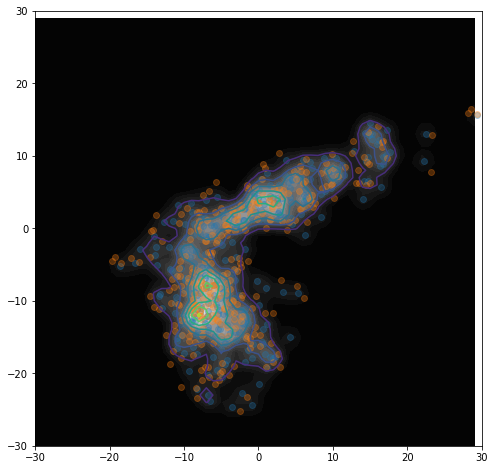

In [25]:
kde_pdf_1=(lambda xy: sum([gm.pdf(xy) for gm in GMS12_1 ])/len(GMS12_1))
plot_2D_pdf(pdf=kde_pdf_1,min_=[-30,-30],max_=[30,30],delta=1)
plt.scatter(X12[:,0],X12[:,1],alpha=0.3)
X12_GM_1_new=np.array([np.random.choice(GMS12_1).rvs(1) for _ in range(300)])
plt.scatter(X12_GM_1_new[:,0],X12_GM_1_new[:,1],alpha=0.3)

Lets try something in the middle between 1 Gaussian (NBGaussian) and 300 Gaussians (Kernel Density Estimate).  

How about 2 Gaussians.  Where do we place them?  Let's ask an unsupervised learning technique called Gaussian Mixture Model.

In [26]:
from sklearn.mixture import GaussianMixture as GMix

In [27]:
GMM=GMix(n_components=2)
GMM.fit(X12)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
GMM.means_

array([[  2.59220134,   4.16640044],
       [ -5.84595607, -11.28893762]])

In [29]:
GMM.covariances_

array([[[86.12115779, 36.099775  ],
        [36.099775  , 20.10524187]],

       [[14.67583024, -6.71705931],
        [-6.71705931, 29.08913905]]])

In [28]:
GMM.__dict__

{'n_components': 2,
 'tol': 0.001,
 'reg_covar': 1e-06,
 'max_iter': 100,
 'n_init': 1,
 'init_params': 'kmeans',
 'random_state': None,
 'warm_start': False,
 'verbose': 0,
 'verbose_interval': 10,
 'covariance_type': 'full',
 'weights_init': None,
 'means_init': None,
 'precisions_init': None,
 'converged_': True,
 'weights_': array([0.47166418, 0.52833582]),
 'means_': array([[  2.59220134,   4.16640044],
        [ -5.84595607, -11.28893762]]),
 'covariances_': array([[[86.12115779, 36.099775  ],
         [36.099775  , 20.10524187]],
 
        [[14.67583024, -6.71705931],
         [-6.71705931, 29.08913905]]]),
 'precisions_cholesky_': array([[[ 0.1077569 , -0.18796591],
         [ 0.        ,  0.44841947]],
 
        [[ 0.26103495,  0.08973596],
         [ 0.        ,  0.19606045]]]),
 'precisions_': array([[[ 0.04694273, -0.08428758],
         [-0.08428758,  0.20108003]],
 
        [[ 0.07619179,  0.01759367],
         [ 0.01759367,  0.0384397 ]]]),
 'n_iter_': 7,
 'lower_bound_':

In [31]:
GMx2=[ multivariate_normal(mean=GMM.means_[i],cov=GMM.covariances_[i]) for i in range(2)]

In [33]:
np.random.choice(GMx2,p=GMM.weights_).rvs(1) 

array([-9.34987899,  0.87911512])

In [34]:
gmx2_pdf=lambda xy: sum([gauss.pdf(xy)*GMM.weights_[i] for i,gauss in enumerate(GMx2) ])

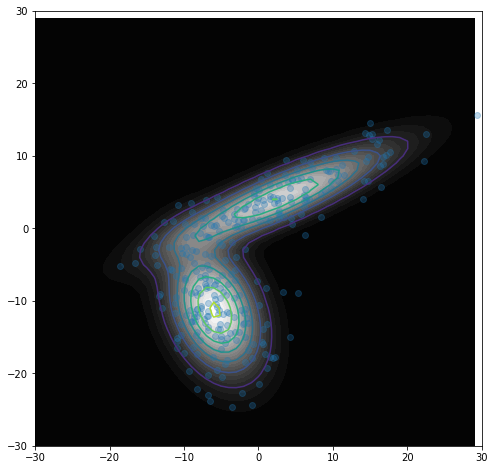

In [35]:
plot_2D_pdf(pdf=gmx2_pdf,min_=[-30,-30],max_=[30,30],delta=1)
plt.scatter(X12[:,0],X12[:,1],alpha=0.3)

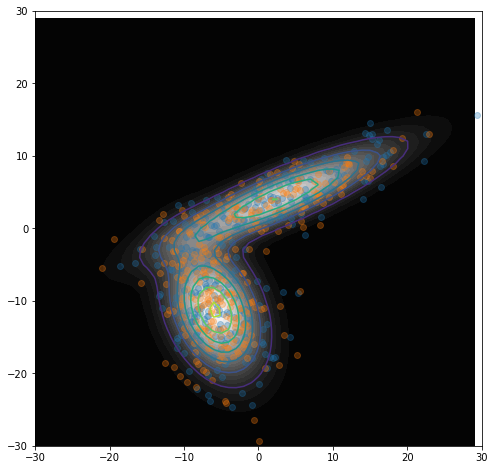

In [36]:
gmx2_new=np.array([np.random.choice(GMx2,p=GMM.weights_).rvs(1) for _ in range(300)])
plot_2D_pdf(pdf=gmx2_pdf,min_=[-30,-30],max_=[30,30],delta=1)
plt.scatter(X12[:,0],X12[:,1],alpha=0.3)
plt.scatter(gmx2_new[:,0],gmx2_new[:,1],alpha=0.3)